In [360]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

my_data = pd.read_csv("sales.csv", delimiter=",")
my_data[0:5]

real_data = pd.read_csv("REAL_DATA.csv")



In [149]:
my_data.shape

(640840, 10)

In [150]:
my_data.head()


,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,425390,366,4,2013-04-18,517,1,0,0,0,4422
1,291687,394,6,2015-04-11,694,1,0,0,0,8297
2,411278,807,4,2013-08-29,970,1,1,0,0,9729
3,664714,802,2,2013-05-28,473,1,1,0,0,6513
4,540835,726,4,2013-10-10,1068,1,1,0,0,10882


In [ ]:
real_data.head

<bound method NDFrame.head of         index  store_ID  day_of_week        date  nb_customers_on_day  open  \
0      272371       415            7  01/03/2015                    0     0   
1      558468        27            7  29/12/2013                    0     0   
2       76950       404            3  19/03/2014                  657     1   
3       77556       683            2  29/01/2013                  862     1   
4      456344       920            3  19/03/2014                  591     1   
...       ...       ...          ...         ...                  ...   ...   
71200   59062       441            7  26/10/2014                    0     0   
71201  687449       377            7  18/08/2013                    0     0   
71202  207393        15            3  11/06/2014                  648     1   
71203  233378       950            2  23/04/2013                  626     1   
71204   85695       932            4  21/11/2013                  828     1   

       promotion stat

In [151]:
my_data.isnull().sum() # check for missing values


Unnamed: 0             0
store_ID               0
day_of_week            0
date                   0
nb_customers_on_day    0
open                   0
promotion              0
state_holiday          0
school_holiday         0
sales                  0
dtype: int64

In [286]:

if "Unnamed: 0" in my_data.columns:
    my_data.drop(columns=["Unnamed: 0"], inplace=True) #dropping the unnamed column.
#my_data = my_data.drop(columns=['date', 'store_ID'])  # You might want to drop the 'date' and 'store_ID' for simplicity

if "state_school_holiday" in my_data.columns:
    my_data.drop(columns=["state_school_holiday"], inplace=True)

In [366]:
def preprocess_real_data(df):
    """Preprocess the real dataset to match training features, handling mixed date formats."""
    
    if "date" in df.columns:
        
        # 📌 Try converting date using multiple formats
        df['date'] = pd.to_datetime(df['date'], errors='coerce')  # Auto-detects format
        
        # 📌 If any NaT values remain, fill with the dataset's minimum date
        if df['date'].isna().sum() > 0:
            df['date'] = df['date'].fillna(df['date'].min())

        # 📌 Convert date into numerical features
        df['date_ordinal'] = df['date'].map(lambda x: x.toordinal())  # Convert to ordinal number
        df['year'] = df['date'].dt.year
        df['month'] = df['date'].dt.month
        df['day'] = df['date'].dt.day
        df['weekday'] = df['date'].dt.weekday
        
        # Drop original date column
        df.drop(columns=["date"], inplace=True)

    # Encode categorical variable
    df['state_holiday'] = df['state_holiday'].astype("category").cat.codes

    # Convert school_holiday to int
    df['school_holiday'] = df['school_holiday'].astype(int)

    if "Index" in df.columns:
        df.drop(columns=["Index"], inplace=True)

    # Drop rows with NaNs (due to lag features)
    df = df.dropna()

    return df


In [361]:
preprocess_real_data(my_data)
preprocess_real_data(real_data)

,index,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday


In [368]:
my_data['state_holiday'] = my_data['state_holiday'].astype(str).astype("category").cat.codes


print("sales.cvs:", my_data.dtypes)

real_data['state_holiday'] = real_data['state_holiday'].astype(str).astype("category").cat.codes


print("REAL_DATA.cvs:", real_data.dtypes)


print("REAL_DATA columns:", real_data.columns)

print("my data columns:", my_data.columns)

sales.cvs: Unnamed: 0                      int64
store_ID                        int64
day_of_week                     int64
date                   datetime64[ns]
nb_customers_on_day             int64
open                            int64
promotion                       int64
state_holiday                    int8
school_holiday                  int64
sales                           int64
dtype: object
REAL_DATA.cvs: index                           int64
store_ID                        int64
day_of_week                     int64
date                   datetime64[ns]
nb_customers_on_day             int64
open                            int64
promotion                       int64
state_holiday                    int8
school_holiday                  int64
dtype: object
REAL_DATA columns: Index(['index', 'store_ID', 'day_of_week', 'date', 'nb_customers_on_day',
       'open', 'promotion', 'state_holiday', 'school_holiday'],
      dtype='object')
my data columns: Index(['Unnamed: 0', 'store_

In [ ]:
print(my_data.describe())

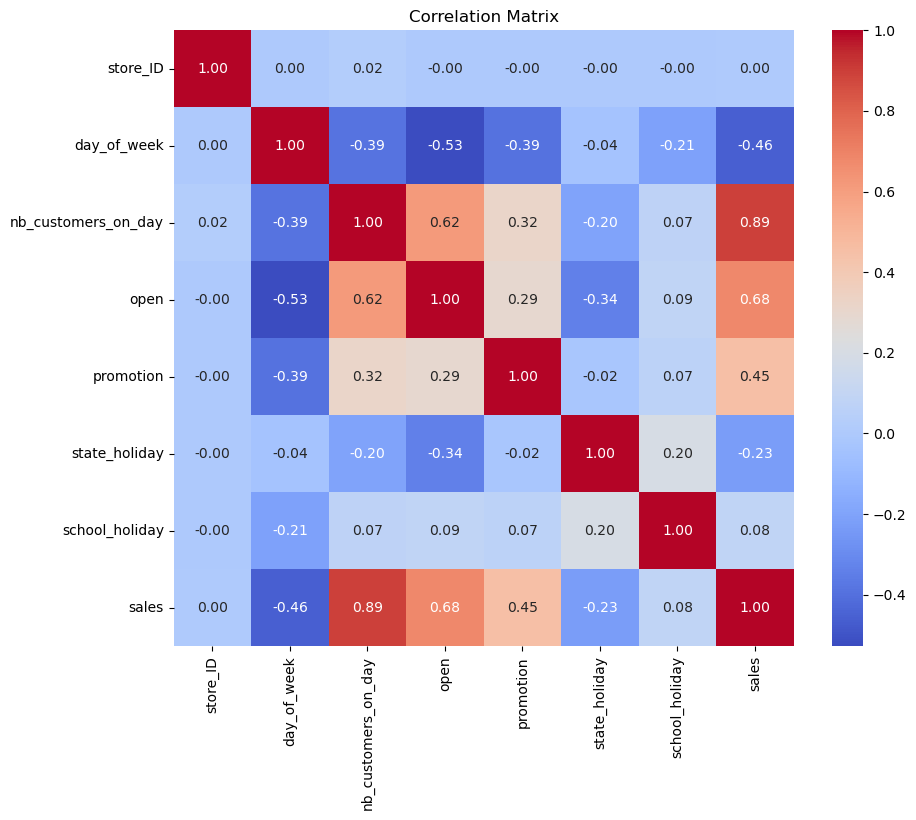

In [305]:
# Compute correlation matrix
correlation_matrix = my_data.corr()

# Display it
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Text(0.5, 1.0, 'Impact of Promotions on Sales')

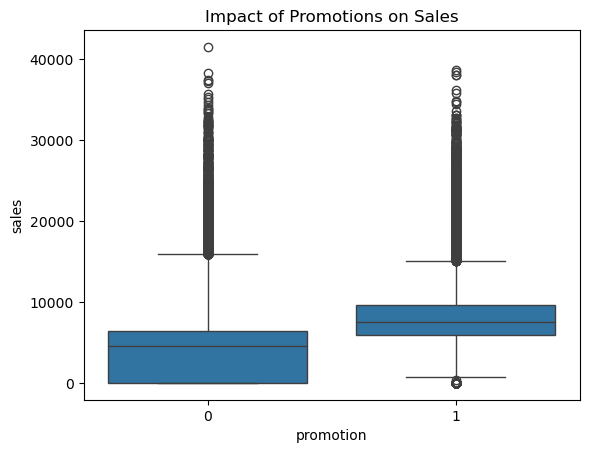

In [158]:
sns.boxplot(x="promotion", y="sales", data=my_data)
plt.title("Impact of Promotions on Sales")


In [327]:
X = my_data.drop(columns=["sales"])  # Drop target variable
y = my_data["sales"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#print("Training Data Summary:\n", X_train.describe())
#print("Testing Data Summary:\n", X_test.describe())

X.dtypes

store_ID               int64
day_of_week            int64
nb_customers_on_day    int64
open                   int64
promotion              int64
state_holiday           int8
school_holiday         int64
dtype: object

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Initialize RandomForest model
rf_model = RandomForestRegressor(random_state=42)

param_grid = {
    "n_estimators": [50, 100, 200],  # ✅ Correct - list of values
    "max_depth": [10, 20, None],  # ✅ Allows deeper trees
    "min_samples_split": [2, 5],  # ✅ Controls when trees split
    "min_samples_leaf": [1, 2],  # ✅ Ensures leaves are meaningful
}


# Use RandomizedSearchCV for faster tuning
rf_random = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid,
    n_iter=10,  # Test 10 random parameter sets (reduces search time)
    cv=2,  # Reduce cross-validation folds for speed
    scoring="neg_mean_absolute_error",
    n_jobs=-1,  # Use all available cores for parallel processing
    verbose=2,
    random_state=42
)

# Fit the Randomized Search model
rf_random.fit(X_train, y_train)

# Print best parameters
print("✅ Best Hyperparameters:", rf_random.best_params_)


In [328]:
import joblib
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train the RandomForest model
best_rf = RandomForestRegressor(n_estimators=100, min_samples_split=5, min_samples_leaf=3, random_state=1)
best_rf.fit(X_train, y_train)

# Predictions
rf_preds = best_rf.predict(X_test)  

# Evaluate performance
print("\n Random Forest Performance:")
print("MAE:", mean_absolute_error(y_test, rf_preds))  
print("MSE:", mean_squared_error(y_test, rf_preds))  
print("R² Score:", r2_score(y_test, rf_preds))  

# 📌 Save the trained RandomForest model
rf_model_path = "random_forest_model.pkl"
joblib.dump(best_rf, rf_model_path)

print(f"Model saved at: {rf_model_path}")



 Random Forest Performance:
MAE: 416.2886439385965
MSE: 534623.0985858343
R² Score: 0.9638320019102338
Model saved at: random_forest_model.pkl


In [ ]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import joblib


dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
# Set the parameters for XGBoost
params = {
    'objective': 'reg:squarederror',  # Regression task
    'eval_metric': 'rmse',  # Root Mean Squared Error (RMSE)
    'max_depth': 6,  # Maximum depth of a tree
    'eta': 0.1,  # Learning rate
    'subsample': 0.8,  # Subsample ratio of the training data
    'colsample_bytree': 0.8,  # Subsample ratio of columns when building each tree
    'verbosity': 0  # Suppress output
}
# Train the model
num_round = 100  # Number of boosting rounds
model = xgb.train(params, dtrain, num_round)
# Make predictions on the test set
y_pred = model.predict(dtest)
# Evaluate the model using RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")
# Optionally, you can save the model for future use
model.save_model("xgboost_sales_model.json")

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Make predictions on the test set
y_pred = model.predict(dtest)
 
print("\n Xgbboost performance:")

# RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")
# MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")
# R² Score (Coefficient of Determination)
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")

RMSE: 1182.9236088062353

 Xgbboost performance:
RMSE: 1182.9236088062353
MAE: 801.9795194650454
R² Score: 0.9053348302841187


In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance, plot_tree
# Plot Feature Importance
plt.figure(figsize=(10, 8))
plot_importance(model, importance_type='weight', max_num_features=20, height=0.8)
plt.title('Feature Importance')
plt.show()
# Visualize a Single Tree
plt.figure(figsize=(20, 16))
plot_tree(model, num_trees=0)  # Change num_trees to visualize a different tree
plt.title('Visualizing XGBoost Tree')
plt.show()

In [184]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge

# Define base models
base_models = [
    ('rf', RandomForestRegressor(n_estimators=100, max_depth=20, random_state=42)),  
    ('xgb', xgb.XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8, random_state=42))
]

# Meta-model (Final Estimator)
meta_model = Ridge()

# Create Stacking Regressor
stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model, n_jobs=-1)

# Train Stacking Model
stacking_model.fit(X_train, y_train)

# Predict
stacked_predictions = stacking_model.predict(X_test)

# Evaluate Stacking Model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, stacked_predictions))
mae = mean_absolute_error(y_test, stacked_predictions)
r2 = r2_score(y_test, stacked_predictions)

print(f"✅ Stacking Model Performance:")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R² Score: {r2}")


✅ Stacking Model Performance:
RMSE: 827.9090017668183
MAE: 518.8939933244393
R² Score: 0.9535243691472934


In [188]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)


Ridge()

In [189]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# 📌 Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# 📌 Make Predictions
y_pred = lr_model.predict(X_test_scaled)

# 📌 Evaluate Model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 📌 Print Performance Metrics
print(f"✅ Linear Regression Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.4f}")

# 📌 Get Feature Importance (Coefficients)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': lr_model.coef_})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

# 📌 Display Top Features
print("\n🔹 Top 10 Features Affecting Sales:")
print(feature_importance.head(10))

✅ Linear Regression Performance:
RMSE: 1476.83
MAE: 981.94
R² Score: 0.8521

🔹 Top 10 Features Affecting Sales:
               Feature  Coefficient
2  nb_customers_on_day  2822.158937
4            promotion   620.946383
3                 open   581.119741
6       school_holiday    33.937630
7      weekend_holiday   -15.069292
0             store_ID   -45.705360
5        state_holiday  -103.017344
1          day_of_week  -132.612670


In [310]:
import os

xgb_model_path = "xgboost_sales_model.json"

if os.path.exists(xgb_model_path):
    print("✅ XGBoost model file found.")
else:
    print("❌ XGBoost model file is missing. Retrain & save the model.")


✅ XGBoost model file found.


In [331]:
# 📌 Load RandomForest Model
rf_model = joblib.load("random_forest_model.pkl")

# 📌 Load XGBoost Model
xgb_model = xgb.Booster()
xgb_model.load_model("xgboost_sales_model.json")

print("✅ Models loaded successfully!")

✅ Models loaded successfully!


In [354]:
print("REAL_DATA.cvs:", real_data.columns)

print("my data columns:", my_data.columns)

real_data.drop(columns=['sales'], inplace=True)

REAL_DATA.cvs: Index(['store_ID', 'day_of_week', 'nb_customers_on_day', 'open', 'promotion',
       'state_holiday', 'school_holiday', 'sales'],
      dtype='object')
my data columns: Index(['store_ID', 'day_of_week', 'nb_customers_on_day', 'open', 'promotion',
       'state_holiday', 'school_holiday', 'sales'],
      dtype='object')


In [355]:


# Prepare Features for Prediction (Drop non-feature columns)
feature_columns = [col for col in real_data.columns if col != 'date']  # Keep store_ID
X_real = real_data[feature_columns]


# Predict Sales using RandomForest
rf_predictions = rf_model.predict(X_real)

# Predict Sales using XGBoost
dreal = xgb.DMatrix(X_real)
xgb_predictions = xgb_model.predict(dreal)

# Combine Predictions (Averaging)
real_data["sales"] = (rf_predictions + xgb_predictions) / 2

# Save Predictions
predicted_file_path = "REAL_DATA_with_predictions.csv"
real_data.to_csv(predicted_file_path, index=False)

# Display Predictions
#import ace_tools as tools
#tools.display_dataframe_to_user(name="Predicted Sales Data", dataframe=real_data)

print("✅ Sales predictions completed! Results saved in:", predicted_file_path)


✅ Sales predictions completed! Results saved in: REAL_DATA_with_predictions.csv


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Initialize RandomForest model
rf_model = RandomForestRegressor(random_state=42)

param_grid = {
    "n_estimators": [50, 100, 200],  # ✅ Correct - list of values
    "max_depth": [10, 20, None],  # ✅ Allows deeper trees
    "min_samples_split": [2, 5],  # ✅ Controls when trees split
    "min_samples_leaf": [1, 2],  # ✅ Ensures leaves are meaningful
}


# Use RandomizedSearchCV for faster tuning
rf_random = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid,
    n_iter=10,  # Test 10 random parameter sets (reduces search time)
    cv=2,  # Reduce cross-validation folds for speed
    scoring="neg_mean_absolute_error",
    n_jobs=-1,  # Use all available cores for parallel processing
    verbose=2,
    random_state=42
)

# Fit the Randomized Search model
rf_random.fit(X_train, y_train)

# Print best parameters
print("✅ Best Hyperparameters:", rf_random.best_params_)


In [ ]:
import pandas as pd

# Load predictions
predicted_data = pd.read_csv("REAL_DATA_with_predictions.csv")

# Show the first few rows
print(predicted_data.head())

# Check summary statistics
print(predicted_data.describe())

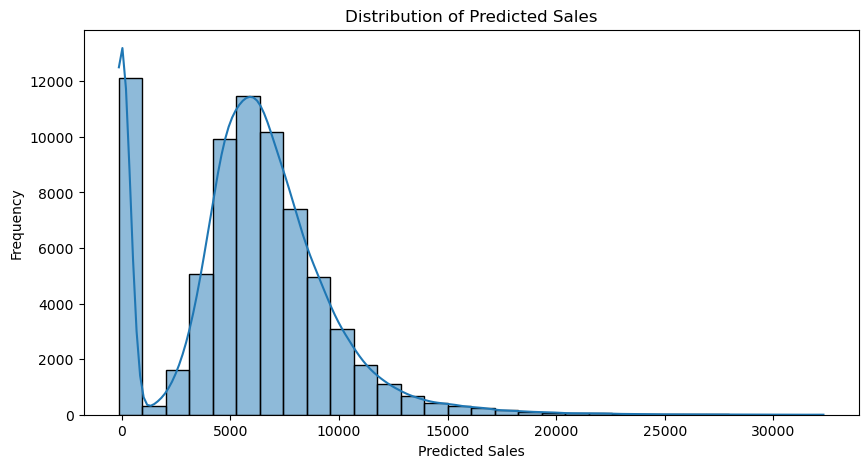

In [357]:
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(predicted_data['sales'], bins=30, kde=True)
plt.xlabel("Predicted Sales")
plt.ylabel("Frequency")
plt.title("Distribution of Predicted Sales")
plt.show()


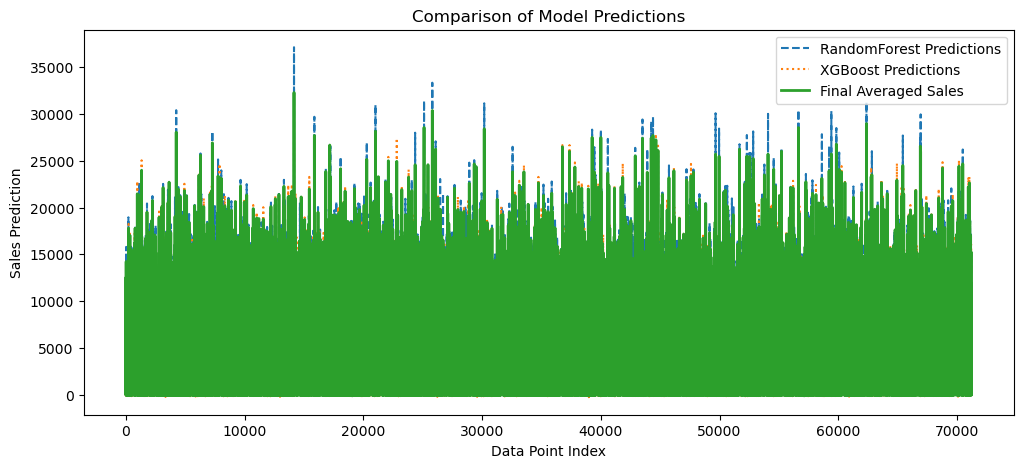

In [358]:
plt.figure(figsize=(12, 5))
plt.plot(predicted_data.index, rf_predictions, label="RandomForest Predictions", linestyle='dashed')
plt.plot(predicted_data.index, xgb_predictions, label="XGBoost Predictions", linestyle='dotted')
plt.plot(predicted_data.index, predicted_data['sales'], label="Final Averaged Sales", linewidth=2)

plt.xlabel("Data Point Index")
plt.ylabel("Sales Prediction")
plt.title("Comparison of Model Predictions")
plt.legend()
plt.show()
